# Using the OpenAssetPricing API for your Project

I have posted data on Moodle. This is another way to get access to that data. I'd love to see you use it and I think it is actually a lot easier.

First, you need to do the usual `pip install` in the terminal. Then, `import` and create an `openap` instance, like I do below.

In [2]:
# Set-up code. Creates an openap instance.
!pip install openassetpricing
import openassetpricing as oap
openap = oap.OpenAP()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 42.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 34.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 25.5 MB/s eta 0:00:00


Whenever I create an object I'm not familiar with, I like to check its type.

In [3]:
type(openap)

openassetpricing.openap_download.OpenAP

OK, that just tells me that this an object that contains methods useful for downloading data from their website. 

Now, we're ready to go. Here's a list of the data that you can access. 

In [4]:
openap.list_port()

┌─────────────────────────────────────────────────┬─────────────────────┐
│ CZ portfolio file                               │ Name for download   │
├─────────────────────────────────────────────────┼─────────────────────┤
│ PredictorAltPorts_Deciles.zip                   │ deciles_ew          │
│ PredictorAltPorts_DecilesVW.zip                 │ deciles_vw          │
│ PredictorAltPorts_LiqScreen_ME_gt_NYSE20pct.zip │ ex_nyse_p20_me      │
│ PredictorAltPorts_LiqScreen_NYSEonly.zip        │ nyse                │
│ PredictorAltPorts_LiqScreen_Price_gt_5.zip      │ ex_price5           │
│ PredictorAltPorts_Quintiles.zip                 │ quintiles_ew        │
│ PredictorAltPorts_QuintilesVW.zip               │ quintiles_vw        │
│ PredictorPortsFull.csv                          │ op                  │
└─────────────────────────────────────────────────┴─────────────────────┘


OK, sure. There's some interesting pieces there. See the ones with "LiqScreen" in the name? These are portfolios formed after excluding certain stocks. Looks like the three screens used are 1) Market value of equity gerater than the 20th percentile of NYSE market cap, 2) NYSE traded only, and 3) stock price greater than five dollars. These types of screens eliminate stocks that might seem like they are attractive to go long or short, but you wouldn't actually be able to.

Let's turn to the actual signals. This puts all of the signals into a `pandas` dataframe. You can see the definitions, where the idea came from (authors, journal), the average return, the statistical significance for that signal using all of the data, etc.

There are 331 signals in the data set. The signals are our **factors**. They are **anomalies**. They are things that predict returns. Things that explain returns. Why some stocks go up and others go down together.

Are they risk-based? Are they truly mistakes that we can exploit for alpha? You tell me. 

You can export the whole thing to a CSV file if you want a copy to read through or have on hand for reference. You can also open it up using DataWrangler here in our Codespace. Just go to the Jupyter window below and open the dataframe. 

In [5]:
signals_list = openap.dl_signal_doc('pandas')
signals_list

,Acronym,Cat.Signal,Predictability in OP,Signal Rep Quality,Authors,Year,LongDescription,Journal,Cat.Form,Cat.Data,...,Return,T-Stat,Stock Weight,LS Quantile,Quantile Filter,Portfolio Period,Start Month,Filter,Notes,Detailed Definition
0,AbnormalAccruals,Predictor,1_clear,2_fair,Xie,2001,Abnormal Accruals,AR,continuous,Accounting,...,0.916666667,8.43,EW,0.1,NA,12,6,NA,OP is aggressive and lags accounting data by o...,Define Accruals as net income (ib) minus opera...
1,Accruals,Predictor,1_clear,1_good,Sloan,1996,Accruals,AR,continuous,Accounting,...,0.866666667,4.71,EW,0.1,NA,12,6,abs(prc)>5,Table 6 year t+1 hedge. Only size adjusted an...,Annual change in current total assets (act) mi...
2,AccrualsBM,Predictor,1_clear,1_good,Bartov and Kim,2004,Book-to-market and accruals,RFQA,discrete,Accounting,...,0.206,5.5,EW,0.2,NA,12,6,NA,NA,Binary variable equal to 1 if stock is in the ...
3,Activism1,Predictor,1_clear,1_good,Cremers and Nair,2005,Takeover vulnerability,JF,continuous,13F,...,0.9025,3.13,VW,0.25,NA,1,6,NA,works a bit better EW in Tab 3,24 minus Governance Index (G). Set to missing ...
4,AM,Predictor,1_clear,1_good,Fama and French,1992,Total assets to market,JF,continuous,Accounting,...,NA,5.69,EW,NA,NA,12,6,NA,NA,Total assets (at) divided by market value of e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,SP_q,Placebo,indirect,NA,"Barbee, Mukherji and Raines",1996,Sales-to-price quarterly,FAJ,continuous,Accounting,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Ratio of annual sales (sale) to market value o...
327,tang_q,Placebo,indirect,NA,Hahn and Lee,2009,Tangibility quarterly,JF,continuous,Accounting,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Cash and short-term investments (che) plus .71...
328,Tax_q,Placebo,indirect,NA,Lev and Nissim,2004,Taxable income to income (qtrly),AR,continuous,Accounting,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Ratio of Taxes paid and tax share of net incom...
329,WW_Q,Placebo,indirect,NA,Whited and Wu,2006,Whited-Wu index,RFS,continuous,Accounting,...,NA,NA,NA,NA,NA,NA,NA,NA,"Insignificant in original paper,",Group data by 3 digit SIC code and month to co...


Let's look at **portfolio returns**. Say I want the monthly returns for every signal. When creating these signals, you are sorting stocks based on a characteristic, like price/book, or the level of abnormal accruals, or their recent returns. You can sort stocks into deciles, quartiles, quintiles, etc. each month, quarter, year. 

So, let's say you have 100 stocks in the bottom decile of some characteristic. Maybe returns over the past year. These are the 100 worst performing stocks. How do you form the portfolio of those 100 stocks? You can value-weight them, so that larger companies get a larger weight (VW). You could equally-weight them, so that all 100 companies get a 1/100 weight in the portfolio (EW). You could do something fancier.

Let's look at signal returns broken into equally-weighted portfolios formed on deciles. In the data below, `signalname` is the abbreviation for the signal. `port` is the decile (01, 02, ... , 10) from the sort. So, lowest values in 01 and the largest values in 10. `port` can also be **LS**, which means that they have already calculated the long-short portfolio return, where you go long the good stocks and short the bad stocks for that signal. `date` is the return date. `ret` is the return. Note that 8.67 = 8.67%. Nlong and Nshort are the number of stocks that portfolio is long (and short). Note that some portfolios are just long the stocks that fall into that decile. Long-short portfolios will contain both long and short positions, naturally. 

In [6]:
# Download equal-weighted decile portfolio returns in Pandas dataframe
deciles_ew = openap.dl_port('deciles_ew', 'pandas')
deciles_ew


Data is downloaded: 4s


,signalname,port,date,ret,signallag,Nlong,Nshort
0,AM,01,1951-07-31,8.671244,0.531410,34,0
1,AM,01,1951-08-31,3.114429,0.493772,34,0
2,AM,01,1951-09-28,-0.271568,0.482126,34,0
3,AM,01,1951-10-31,-4.732506,0.487108,34,0
4,AM,01,1951-11-30,1.092562,0.513399,34,0
...,...,...,...,...,...,...,...
1572317,zerotrade6M,LS,2023-08-31,6.346115,NaN,242,242
1572318,zerotrade6M,LS,2023-09-29,5.213919,NaN,241,241
1572319,zerotrade6M,LS,2023-10-31,3.412397,NaN,238,239
1572320,zerotrade6M,LS,2023-11-30,-5.052520,NaN,238,238


You can change how the portfolios are formed (e.g. to quintiles and value-weighted), as well as select specific signals that you want to look at. The latter dramatically shrinks the size of the dataframe and will make your code run faster, since there are fewer rows.

Have you noticed athat all of this data are **long data**? There's also no index to any of the dataframes.

In [7]:
quintiles_vw = openap.dl_port('quintiles_vw', 'pandas', ['BM', 'Mom12m'])
quintiles_vw


Data is downloaded: 10s


,signalname,port,date,ret,signallag,Nlong,Nshort
0,BM,01,1951-07-31,6.324465,-0.921486,65,0
1,BM,01,1951-08-31,4.121121,-0.919069,65,0
2,BM,01,1951-09-28,0.393433,-0.917030,65,0
3,BM,01,1951-10-31,-5.521909,-0.912968,65,0
4,BM,01,1951-11-30,0.624145,-0.910410,65,0
...,...,...,...,...,...,...,...
12199,Mom12m,LS,2023-08-31,9.544257,NaN,972,966
12200,Mom12m,LS,2023-09-29,2.787193,NaN,968,950
12201,Mom12m,LS,2023-10-31,10.171838,NaN,969,968
12202,Mom12m,LS,2023-11-30,4.076001,NaN,958,951


Those were portfolio returns. Let's look at the actual **signals**. I'm going to pull the `Mom12m` signal for all stocks over all periods.

In [8]:
Mom12m = openap.dl_signal('pandas', ['Mom12m'])
Mom12m



Data is downloaded: 7s


,permno,yyyymm,Mom12m
0,10000,198612,-0.810714
1,10000,198701,-0.882143
2,10000,198702,-0.875000
3,10000,198703,-0.908451
4,10000,198704,-0.937500
...,...,...,...
3658484,93436,202308,-0.029678
3658485,93436,202309,-0.027030
3658486,93436,202310,0.099676
3658487,93436,202311,0.031537


What is that `Mom12m` column? It's what you get if you calculate the that value, 12-month momentum, for each stock in that year-month. Alright, so what does that exactly mean?

We can read more about just that signal by doing this.

In [9]:
Mom12m_description = signals_list[signals_list['Acronym'] == 'Mom12m']
Mom12m_description

,Acronym,Cat.Signal,Predictability in OP,Signal Rep Quality,Authors,Year,LongDescription,Journal,Cat.Form,Cat.Data,...,Return,T-Stat,Stock Weight,LS Quantile,Quantile Filter,Portfolio Period,Start Month,Filter,Notes,Detailed Definition
98,Mom12m,Predictor,1_clear,1_good,Jegadeesh and Titman,1993,Momentum (12 month),JF,continuous,Price,...,1.31,3.74,EW,0.1,NA,3,6,NA,see Mom6m,Stock return between months t-12 and t-1


I scroll all the way over to `Detailed Definition`: Stock return between months t-12 and t-1. So, for any year-month t, go back one month and then calculate the return over the past 12-months. Buy the best performing stocks on this measure. Short the worst. You get a 1.31% average monthly return with a *t*-stat of 3.7.

So, those values that you see are the actual 12-month returns for that stock. That's not a score or a ranking. It's the raw return calculated given that definition of momentum. The other signals are going to be similar. Look up the definition, see how it gets calculated. That's the value.

Not all signals are returns. Think about something like price-to-book. 

You could now rank stocks using a signal if you want. Maybe merger in some fund holdings and see how they rank?

Let's make a histogram of all momentum values in our database. Just to see what they look like. What should the lowest possible return be? How about the largest? Remember, these are just stock returns. For any other signal, you need a sense of what the distribution of the values should look like.

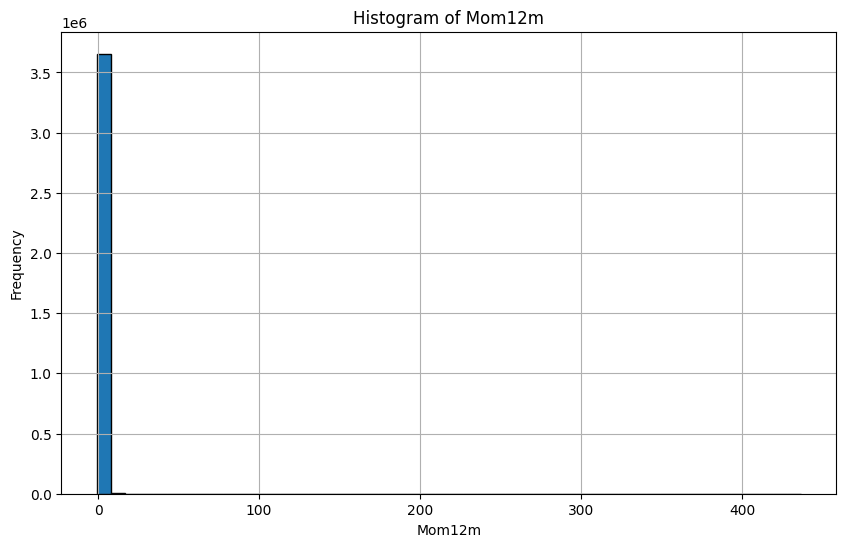

In [10]:
import matplotlib.pyplot as plt

# Create a histogram of the Mom12m column
Mom12m['Mom12m'].hist(bins=50, edgecolor='black', figsize=(10, 6))
plt.title('Histogram of Mom12m')
plt.xlabel('Mom12m')
plt.ylabel('Frequency')
plt.show()

Wow... that's awful. Please don't turn anything in that looks like that. What's going on? 

**Outliers**. It looks like 1 = 100% in this data. Almost all of the returns are around 0, which makes perfect sense then. Let's look at the descriptives.

In [11]:
Mom12m.describe()

,permno,yyyymm,Mom12m
count,3.658489e+06,3.658489e+06,3.658489e+06
mean,5.012899e+04,1.990338e+05,1.336463e-01
std,2.852167e+04,2.093349e+03,7.698344e-01
min,1.000000e+04,1.926110e+05,-9.999949e-01
25%,2.107100e+04,1.978100e+05,-2.082034e-01
50%,4.901500e+04,1.993060e+05,4.615456e-02
75%,7.896500e+04,2.005120e+05,3.216285e-01
max,9.343600e+04,2.023120e+05,4.366845e+02


See the minimum return? -0.99, or just a bit more that -100%. Those are stocks who went to zero in the past year. I'll bet you can't actually short them. The max return then? That's +43,600%. I'll bet that stock was tiny.

Think about trying to form a portfolio using past returns. Can you short anything you want? Can you go long anything you want? These kind of real world **frictions** drive up trading costs. You're often left with portfolios that look good on paper, but then don't actually work in practice.

I'm going to **trim** the bottom 10% and top 10% of returns and look again. In practice, people will drop stocks that are small from their universe. 

In [12]:
# Calculate the 10th and 90th percentiles
lower_bound = Mom12m['Mom12m'].quantile(0.10)
upper_bound = Mom12m['Mom12m'].quantile(0.90)

# Keep only values between the 10th and 90th percentiles
trimmed = Mom12m[(Mom12m['Mom12m'] >= lower_bound) & (Mom12m['Mom12m'] <= upper_bound)]

trimmed.describe()

,permno,yyyymm,Mom12m
count,2.926791e+06,2.926791e+06,2.926791e+06
mean,4.904070e+04,1.989696e+05,6.022275e-02
std,2.825277e+04,2.104893e+03,2.766566e-01
min,1.000100e+04,1.926110e+05,-4.666678e-01
25%,2.093300e+04,1.977100e+05,-1.470581e-01
50%,4.695000e+04,1.992080e+05,4.615456e-02
75%,7.803400e+04,2.005100e+05,2.522933e-01
max,9.343600e+04,2.023120e+05,7.069610e-01


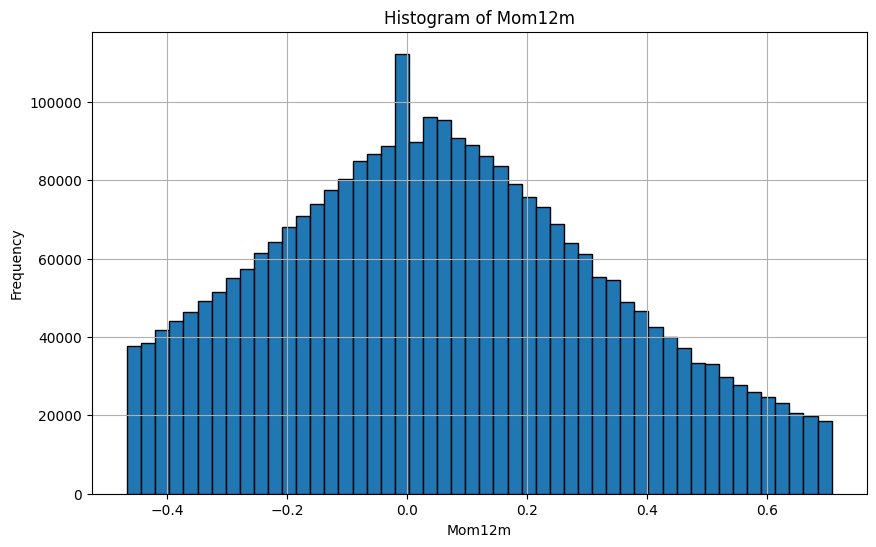

In [13]:
# Create a histogram of the trimmed Mom12m column
trimmed['Mom12m'].hist(bins=50, edgecolor='black', figsize=(10, 6))
plt.title('Histogram of Mom12m')
plt.xlabel('Mom12m')
plt.ylabel('Frequency')
plt.show()

That makes much more sense. 

This is an example of the kind of data issues that are going to crop up. Keep your critical thinking hats on! See the kind of trouble that blindly following some LLM-generated code can get you in!?

Finally, let's turn back to some of the portfolio returns. I'm going to look at the portfolio returns where I have excluded the smallest NYSE stocks from the universe.

In [14]:
# Portfolio returns with a liquidity screen
ex_nyse_p20_me = openap.dl_port('ex_nyse_p20_me', 'pandas')
ex_nyse_p20_me


Data is downloaded: 12s


,signalname,port,date,ret,signallag,Nlong,Nshort
0,AM,01,1951-07-31,8.005177,0.664996,61,0
1,AM,01,1951-08-31,3.606054,0.621851,61,0
2,AM,01,1951-09-28,1.248543,0.601500,61,0
3,AM,01,1951-10-31,-4.156259,0.597606,61,0
4,AM,01,1951-11-30,0.866864,0.623970,61,0
...,...,...,...,...,...,...,...
1204269,zerotrade6M,LS,2023-08-31,5.316045,NaN,458,459
1204270,zerotrade6M,LS,2023-09-29,1.709671,NaN,457,457
1204271,zerotrade6M,LS,2023-10-31,2.762453,NaN,454,455
1204272,zerotrade6M,LS,2023-11-30,-2.759667,NaN,453,454


Let me just keep the long-short portfolios.

In [15]:
# Filter the dataframe to keep only rows where port equals 'LS'
ls_only = ex_nyse_p20_me[ex_nyse_p20_me['port'] == 'LS']

# Display the filtered dataframe
ls_only

,signalname,port,date,ret,signallag,Nlong,Nshort
4350,AM,LS,1951-07-31,0.138182,NaN,61,61
4351,AM,LS,1951-08-31,2.441605,NaN,59,61
4352,AM,LS,1951-09-28,1.316786,NaN,59,61
4353,AM,LS,1951-10-31,0.607922,NaN,60,61
4354,AM,LS,1951-11-30,1.211060,NaN,59,61
...,...,...,...,...,...,...,...
1204269,zerotrade6M,LS,2023-08-31,5.316045,NaN,458,459
1204270,zerotrade6M,LS,2023-09-29,1.709671,NaN,457,457
1204271,zerotrade6M,LS,2023-10-31,2.762453,NaN,454,455
1204272,zerotrade6M,LS,2023-11-30,-2.759667,NaN,453,454


Now, let me just check some units for the return column.

In [16]:
ls_only.describe()

,date,ret,signallag,Nlong,Nshort
count,169091,169091.000000,0.0,169091.000000,169091.000000
mean,1986-06-27 04:05:29.148000,0.353518,NaN,316.423458,291.728537
min,1926-01-30 00:00:00,-85.328316,NaN,1.000000,1.000000
25%,1969-01-31 00:00:00,-1.257583,NaN,98.000000,91.000000
50%,1989-07-31 00:00:00,0.274694,NaN,218.000000,210.000000
75%,2006-10-31 00:00:00,1.893277,NaN,393.000000,386.000000
max,2023-12-29 00:00:00,123.683755,NaN,4009.000000,3998.000000
std,NaN,4.094481,NaN,393.705286,316.295793


OK, that seems like 1 = 1%. So, the average return of a Long-short monthly portfolio across ALL signals and ALL dates is 0.3535%. The worst month is -85.33%. I wonder which long-short portfolio did that! The max return is 123.69%. Again, that's a monthly return.